https://www.tensorflow.org/tutorials/keras/overfit_and_underfit?hl=ko

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0

    return results

train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

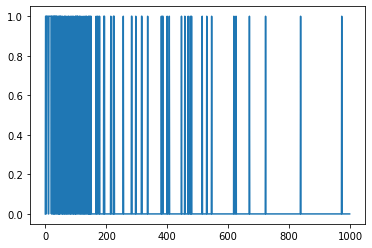

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

baseline_model.compile(optimizer="adam",
                       loss="binary_crossentropy",
                       metrics=["accuracy", "binary_crossentropy"])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.5550 - accuracy: 0.7252 - binary_crossentropy: 0.5550 - val_loss: 0.4197 - val_accuracy: 0.8256 - val_binary_crossentropy: 0.4197
Epoch 2/20
49/49 - 0s - loss: 0.3662 - accuracy: 0.8487 - binary_crossentropy: 0.3662 - val_loss: 0.3433 - val_accuracy: 0.8555 - val_binary_crossentropy: 0.3433
Epoch 3/20
49/49 - 0s - loss: 0.3228 - accuracy: 0.8666 - binary_crossentropy: 0.3228 - val_loss: 0.3310 - val_accuracy: 0.8595 - val_binary_crossentropy: 0.3310
Epoch 4/20
49/49 - 0s - loss: 0.3077 - accuracy: 0.8728 - binary_crossentropy: 0.3077 - val_loss: 0.3275 - val_accuracy: 0.8607 - val_binary_crossentropy: 0.3275
Epoch 5/20
49/49 - 0s - loss: 0.3022 - accuracy: 0.8745 - binary_crossentropy: 0.3022 - val_loss: 0.3276 - val_accuracy: 0.8609 - val_binary_crossentropy: 0.3276
Epoch 6/20
49/49 - 0s - loss: 0.2950 - accuracy: 0.8793 - binary_crossentropy: 0.2950 - val_loss: 0.3283 - val_accuracy: 0.8613 - val_binary_crossentropy: 0.3283
Epoch 7/20
49/49 - 0s - loss

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation="relu", input_shape=(NUM_WORDS, )),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

smaller_model.compile(optimizer="adam",
                      loss="binary_crossentropy",
                      metrics=["accuracy", "binary_crossentropy"])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6912 - accuracy: 0.5301 - binary_crossentropy: 0.6912 - val_loss: 0.6863 - val_accuracy: 0.5582 - val_binary_crossentropy: 0.6863
Epoch 2/20
49/49 - 0s - loss: 0.6710 - accuracy: 0.6150 - binary_crossentropy: 0.6710 - val_loss: 0.6509 - val_accuracy: 0.6875 - val_binary_crossentropy: 0.6509
Epoch 3/20
49/49 - 0s - loss: 0.6212 - accuracy: 0.7213 - binary_crossentropy: 0.6212 - val_loss: 0.5945 - val_accuracy: 0.7717 - val_binary_crossentropy: 0.5945
Epoch 4/20
49/49 - 0s - loss: 0.5629 - accuracy: 0.7875 - binary_crossentropy: 0.5629 - val_loss: 0.5409 - val_accuracy: 0.8035 - val_binary_crossentropy: 0.5409
Epoch 5/20
49/49 - 0s - loss: 0.5126 - accuracy: 0.8224 - binary_crossentropy: 0.5126 - val_loss: 0.4983 - val_accuracy: 0.8243 - val_binary_crossentropy: 0.4983
Epoch 6/20
49/49 - 0s - loss: 0.4729 - accuracy: 0.8393 - binary_crossentropy: 0.4729 - val_loss: 0.4654 - val_accuracy: 0.8441 - val_binary_crossentropy: 0.4654
Epoch 7/20
49/49 - 0s - loss

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(NUM_WORDS, )),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

bigger_model.compile(optimizer="adam",
                     loss="binary_crossentropy",
                     metrics=["accuracy", "binary_crossentropy"])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 3s - loss: 0.4284 - accuracy: 0.7992 - binary_crossentropy: 0.4284 - val_loss: 0.3319 - val_accuracy: 0.8586 - val_binary_crossentropy: 0.3319
Epoch 2/20
49/49 - 3s - loss: 0.2947 - accuracy: 0.8791 - binary_crossentropy: 0.2947 - val_loss: 0.3290 - val_accuracy: 0.8570 - val_binary_crossentropy: 0.3290
Epoch 3/20
49/49 - 3s - loss: 0.2275 - accuracy: 0.9088 - binary_crossentropy: 0.2275 - val_loss: 0.3395 - val_accuracy: 0.8559 - val_binary_crossentropy: 0.3395
Epoch 4/20
49/49 - 3s - loss: 0.1131 - accuracy: 0.9644 - binary_crossentropy: 0.1131 - val_loss: 0.4243 - val_accuracy: 0.8461 - val_binary_crossentropy: 0.4243
Epoch 5/20
49/49 - 3s - loss: 0.0319 - accuracy: 0.9937 - binary_crossentropy: 0.0319 - val_loss: 0.5291 - val_accuracy: 0.8465 - val_binary_crossentropy: 0.5291
Epoch 6/20
49/49 - 3s - loss: 0.0082 - accuracy: 0.9991 - binary_crossentropy: 0.0082 - val_loss: 0.6105 - val_accuracy: 0.8488 - val_binary_crossentropy: 0.6105
Epoch 7/20
49/49 - 3s - loss

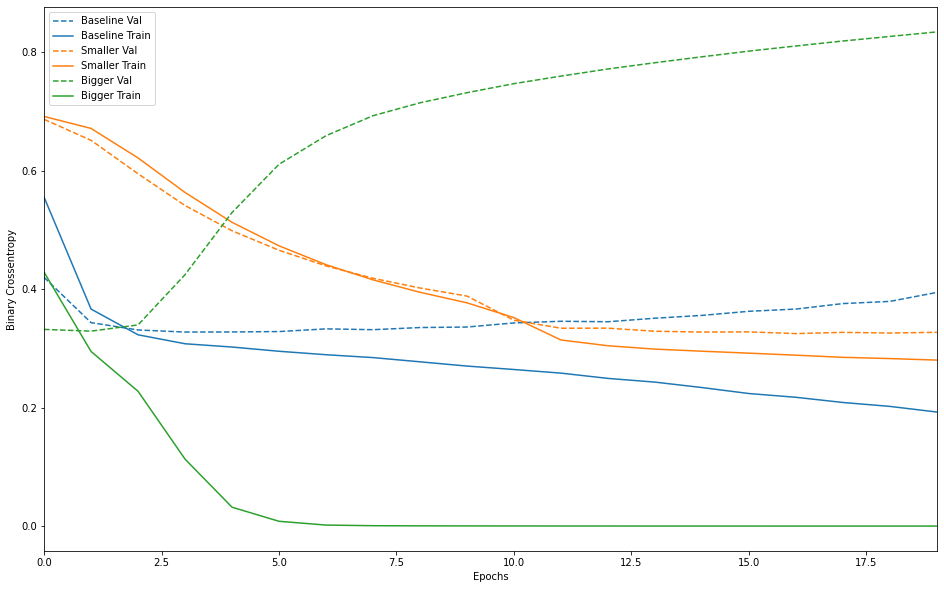

In [10]:
def plot_history(histories, key="binary_crossentropy"):
    plt.figure(figsize=(16, 10))

    for name, history in histories:
        val = plt.plot(history.epoch, history.history["val_" + key],
                       '--', label=name.title() + " Val")
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title() + " Train")
        
    plt.xlabel("Epochs")
    plt.ylabel(key.replace('_', ' ').title())
    plt.legend()

    plt.xlim([0, max(history.epoch)])

plot_history([("baseline", baseline_history),
              ("smaller", smaller_history),
              ("bigger", bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation="relu", input_shape=(NUM_WORDS, )),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

l2_model.compile(optimizer="adam",
                 loss="binary_crossentropy",
                 metrics=["accuracy", "binary_crossentropy"])

l2_model_history = l2_model.fit(train_data,
                                train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6518 - accuracy: 0.6797 - binary_crossentropy: 0.6109 - val_loss: 0.5030 - val_accuracy: 0.8134 - val_binary_crossentropy: 0.4652
Epoch 2/20
49/49 - 0s - loss: 0.4203 - accuracy: 0.8429 - binary_crossentropy: 0.3825 - val_loss: 0.3890 - val_accuracy: 0.8514 - val_binary_crossentropy: 0.3513
Epoch 3/20
49/49 - 0s - loss: 0.3617 - accuracy: 0.8663 - binary_crossentropy: 0.3242 - val_loss: 0.3694 - val_accuracy: 0.8587 - val_binary_crossentropy: 0.3327
Epoch 4/20
49/49 - 0s - loss: 0.3473 - accuracy: 0.8714 - binary_crossentropy: 0.3112 - val_loss: 0.3715 - val_accuracy: 0.8567 - val_binary_crossentropy: 0.3361
Epoch 5/20
49/49 - 0s - loss: 0.3414 - accuracy: 0.8739 - binary_crossentropy: 0.3067 - val_loss: 0.3611 - val_accuracy: 0.8600 - val_binary_crossentropy: 0.3270
Epoch 6/20
49/49 - 0s - loss: 0.3353 - accuracy: 0.8764 - binary_crossentropy: 0.3017 - val_loss: 0.3607 - val_accuracy: 0.8606 - val_binary_crossentropy: 0.3276
Epoch 7/20
49/49 - 0s - loss

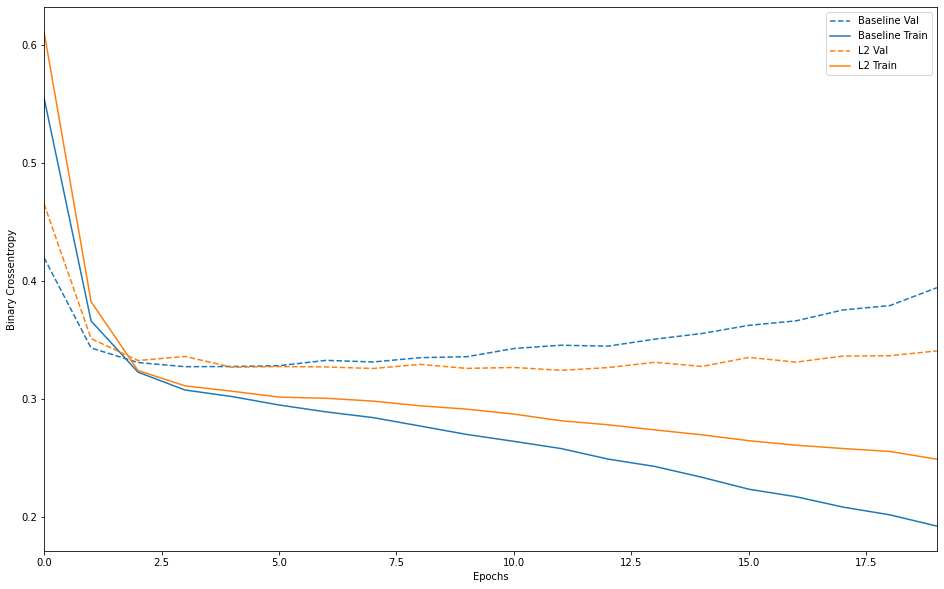

In [12]:
plot_history([("baseline", baseline_history),
              ("l2", l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(NUM_WORDS, )),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation="sigmoid")
])

dpt_model.compile(optimizer="adam",
                  loss="binary_crossentropy",
                  metrics=["accuracy", "binary_crossentropy"])

dpt_model_history = dpt_model.fit(train_data,
                                  train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6781 - accuracy: 0.5632 - binary_crossentropy: 0.6781 - val_loss: 0.6094 - val_accuracy: 0.7380 - val_binary_crossentropy: 0.6094
Epoch 2/20
49/49 - 0s - loss: 0.5795 - accuracy: 0.6936 - binary_crossentropy: 0.5795 - val_loss: 0.4550 - val_accuracy: 0.8280 - val_binary_crossentropy: 0.4550
Epoch 3/20
49/49 - 0s - loss: 0.4805 - accuracy: 0.7850 - binary_crossentropy: 0.4805 - val_loss: 0.3672 - val_accuracy: 0.8486 - val_binary_crossentropy: 0.3672
Epoch 4/20
49/49 - 0s - loss: 0.4256 - accuracy: 0.8229 - binary_crossentropy: 0.4256 - val_loss: 0.3439 - val_accuracy: 0.8553 - val_binary_crossentropy: 0.3439
Epoch 5/20
49/49 - 0s - loss: 0.3936 - accuracy: 0.8393 - binary_crossentropy: 0.3936 - val_loss: 0.3293 - val_accuracy: 0.8582 - val_binary_crossentropy: 0.3293
Epoch 6/20
49/49 - 0s - loss: 0.3723 - accuracy: 0.8526 - binary_crossentropy: 0.3723 - val_loss: 0.3247 - val_accuracy: 0.8596 - val_binary_crossentropy: 0.3247
Epoch 7/20
49/49 - 0s - loss